In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json







## Population Analysis

In [2]:
# Read in data files for population data
total_pop = "Resources/population.csv"
west_pop = "Resources/westcoastpop.csv"
east_pop = "Resources/eastcoastpop.csv"

total_pop = pd.read_csv(total_pop) 
west_pop = pd.read_csv(west_pop)
east_pop = pd.read_csv(east_pop)

total_pop.index=['2014','2015','2016','2017','2018']
new_pop=total_pop.drop(['Unnamed: 0'],axis=1)

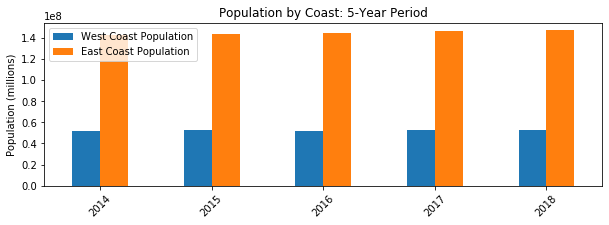

In [3]:
total_pop.drop(['Unnamed: 0'],axis=1).plot(kind="bar", figsize=(10,3), rot=45)
plt.title('Population by Coast: 5-Year Period')
plt.ylabel('Population (millions)')  
plt.savefig('TotP.png')
plt.show()

## GDP Analysis

In [8]:
# Read in the east coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_East.csv', thousands=',')
east_data = pd.DataFrame(csv_file)
east_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']
east_data

,State,2014,2015,2016,2017,2018
0,AL,194211.0,200402.7,203829.8,210364.4,221735.5
1,MS,104146.0,105883.4,107096.6,110223.4,114834.2
2,ME,55795.4,57525.7,59753.9,62040.3,64856.0
3,NY,1427495.2,1487754.1,1539555.2,1604133.6,1668866.2
4,VA,463477.6,484216.6,493877.9,509372.8,532892.5
5,LA,238679.5,234299.1,227226.7,239204.3,257287.8
6,MA,473279.0,502858.0,519407.6,540786.0,569488.0
7,MD,352046.7,367096.5,384889.1,394258.6,412584.2
8,FL,839484.1,895146.2,938774.2,985665.4,1039236.4
9,GA,485816.7,513565.6,539525.1,566473.6,592153.4


In [9]:
# Sum total of east coast GDP per year
east_sum = east_data.sum()
east_sum

State    ALMSMENYVALAMAMDFLGATXNCSCNHNJCTDERI
2014                              7.86439e+06
2015                              8.15827e+06
2016                              8.36352e+06
2017                              8.72348e+06
2018                              9.19033e+06
dtype: object

In [11]:
# Read in the west coast GDP CSV
csv_file = pd.read_csv('https://media.githubusercontent.com/media/deirdrebclark/Project1/master/output_data/GDP_West.csv', thousands=',')
west_data = pd.DataFrame(csv_file)
west_data.columns = ['State', '2014', '2015', '2016', '2017', '2018']
west_data

,State,2014,2015,2016,2017,2018
0,AK,55523.4,50641.6,49363.4,51803.1,54734.1
1,CA,2395162.3,2553772.2,2657797.6,2819110.7,2997732.8
2,HI,77854.3,82710.0,85843.8,89428.9,93797.9
3,OR,188880.2,203158.9,215050.4,226618.9,239782.8
4,WA,442201.3,470329.3,491358.2,524814.6,565831.0


In [12]:
# Sum total of west coast GDP per year
west_sum = west_data.sum()
west_df = pd.DataFrame(west_sum)
west_df

,0
State,AKCAHIORWA
2014,3.15962e+06
2015,3.36061e+06
2016,3.49941e+06
2017,3.71178e+06
2018,3.95188e+06


In [13]:
# Combine the two into a total GDP summary table
sum_df = pd.DataFrame(east_sum)
sum_df.columns = ['East Coast']
sums_df = sum_df.join(west_df)
sums_df.columns = ['East Coast', 'West Coast']
sums_df = sums_df.T
del sums_df['State']
sums_df

,2014,2015,2016,2017,2018
East Coast,7.86439e+06,8.15827e+06,8.36352e+06,8.72348e+06,9.19033e+06
West Coast,3.15962e+06,3.36061e+06,3.49941e+06,3.71178e+06,3.95188e+06


In [14]:
# Transform GDP Summary table for readability
sums_df = sums_df.T
sums_df

,East Coast,West Coast
2014,7.86439e+06,3.15962e+06
2015,8.15827e+06,3.36061e+06
2016,8.36352e+06,3.49941e+06
2017,8.72348e+06,3.71178e+06
2018,9.19033e+06,3.95188e+06


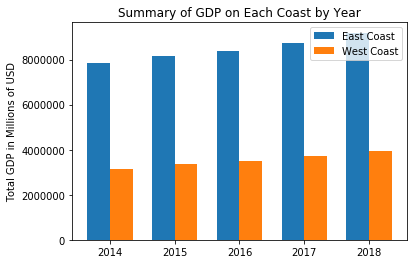

In [15]:
# Summary East v West coast bar plot

labels = ['2014', '2015', '2016', '2017', '2018']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sums_df['East Coast'], width, label='East Coast')
rects2 = ax.bar(x + width/2, sums_df['West Coast'], width, label='West Coast')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total GDP in Millions of USD')
ax.set_title('Summary of GDP on Each Coast by Year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## Coastline Analysis

In [16]:
# Open coastline CSV
csv_file = pd.read_csv("https://media.githubusercontent.com/media/deirdrebclark/Project1/master/Resources/coastline.csv", thousands=",")
coast_df = pd.DataFrame(csv_file)

# Format the coastline Dataframe
coast_df.columns = ['State', 'Coastline']
coast_df['Coastline'] = coast_df['Coastline'].str.strip(' mi')
coast_df['Coastline'] = coast_df['Coastline'].str.replace(',' , '')
coast_df['Coastline'] = coast_df['Coastline'].astype(int)
coast_df

,State,Coastline
0,Alaska,33904
1,Florida,8436
2,California,3427
3,Hawaii,1052
4,Louisiana,7721
5,Texas,3359
6,North Carolina,3375
7,Oregon,1410
8,Maine,3478
9,Massachusetts,1519


In [ ]:
# Barplot for coastline values
plt.bar(coast_df['State'], coast_df['Coastline'])
plt.xticks(rotation="vertical")
plt.ylabel("Coastline (mi)")
plt.xlabel("State")
plt.title("Coastline per State")
plt.show()